## Linear regression

In [19]:
%matplotlib inline
#import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
learning_rate = 0.01
training_epochs = 100

In [21]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [22]:
x_train.shape

(101,)

In [23]:
y_train.shape

(101,)

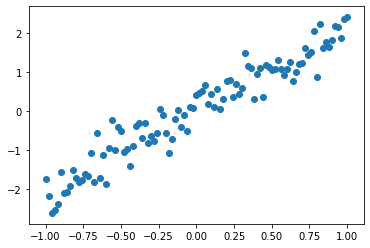

In [24]:
plt.scatter(x_train, y_train)

In [25]:
#sess = tf.Session()

In [27]:
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [29]:
X,Y

(<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>)

In [30]:
def model(X, w):
    return tf.multiply(X, w)

In [32]:
w = tf.Variable(0.0, name="weights")

In [33]:
w

<tf.Variable 'weights:0' shape=() dtype=float32_ref>

In [34]:
y_model = model(X, w)
cost = tf.reduce_mean(tf.square(Y-y_model))

In [35]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [37]:
train_op

<tf.Operation 'GradientDescent' type=NoOp>

In [38]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [39]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [40]:
w_val = sess.run(w)

In [41]:
sess.close()

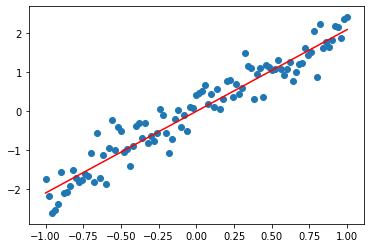

In [42]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

## Polynomial regression

In [44]:
trX = np.linspace(-1, 1, 101)

In [46]:
trX

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [47]:
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

In [48]:
trX

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [49]:
trY

array([-3.        , -2.65525198, -2.33964739, -2.05121533, -1.78807634,
       -1.54844   , -1.3306027 , -1.13294531, -0.95393085, -0.79210226,
       -0.64608   , -0.51455982, -0.39631043, -0.29017117, -0.19504978,
       -0.10992   , -0.03381934,  0.03415325,  0.09483971,  0.1490251 ,
        0.19744   ,  0.24076274,  0.27962173,  0.31459779,  0.34622638,
        0.375     ,  0.40137042,  0.42575101,  0.44851907,  0.47001806,
        0.49056   ,  0.5104277 ,  0.52987709,  0.54913955,  0.56842414,
        0.58792   ,  0.60779858,  0.62821597,  0.64931523,  0.67122862,
        0.69408   ,  0.71798706,  0.74306365,  0.76942211,  0.7971755 ,
        0.82644   ,  0.85733714,  0.88999613,  0.92455619,  0.96116878,
        1.        ,  1.04123282,  1.08506941,  1.13173347,  1.18147246,
        1.23456   ,  1.2912981 ,  1.35201949,  1.41708995,  1.48691054,
        1.56192   ,  1.64259698,  1.72946237,  1.82308163,  1.92406702,
        2.03308   ,  2.15083346,  2.27809405,  2.41568451,  2.56

In [52]:
trX.shape, trY.shape

((101,), (101,))

In [55]:
trY += np.random.randn(*trX.shape) * 1.5

In [56]:
trY

array([-2.70465373e+00, -3.41644146e+00, -1.36080338e+00, -4.84926570e+00,
       -1.49549946e+00, -4.61553977e+00, -3.12887449e+00, -3.84476390e-02,
        7.30119649e-01,  6.67610192e-01, -2.81773139e-01, -5.01497378e-01,
       -1.50171032e+00,  1.37535348e-01, -5.05074002e-01,  2.72062833e+00,
        9.55612444e-01,  1.20800890e+00,  1.95347389e+00,  1.28013205e+00,
        1.74345894e+00,  1.63570214e+00,  2.23916105e+00,  4.34590994e-01,
        4.39799761e-02, -3.47100337e-01, -9.67249051e-01,  2.09163761e+00,
       -1.47086282e+00,  1.00506000e+00,  1.51530700e+00, -1.59030550e+00,
        2.98294951e+00,  6.34316163e-01,  3.07940585e-01,  1.28918129e+00,
        3.58033483e+00,  2.31939981e+00, -2.40980256e+00, -1.62202083e+00,
       -1.40817989e+00,  1.50053291e+00,  3.51048474e-01, -2.41199437e+00,
       -1.92112667e+00, -3.64134502e-02,  4.11655425e-01,  1.44645011e+00,
       -8.76970147e-01,  5.81609942e-01,  1.11627162e+00,  2.16336146e+00,
       -1.30073764e+00,  

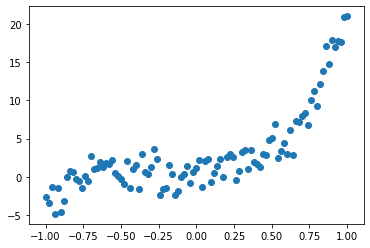

In [57]:
plt.scatter(trX, trY)
plt.show()

In [58]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [59]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [60]:
w = tf.Variable([0.] * num_coeffs, name="parameters")

In [61]:
w

<tf.Variable 'parameters:0' shape=(6,) dtype=float32_ref>

In [62]:
y_model = model(X, w)

In [63]:
y_model

<tf.Tensor 'AddN:0' shape=<unknown> dtype=float32>

In [64]:
w

<tf.Variable 'parameters:0' shape=(6,) dtype=float32_ref>

In [65]:
w.value

<bound method RefVariable.value of <tf.Variable 'parameters:0' shape=(6,) dtype=float32_ref>>

In [66]:
cost = tf.reduce_sum(tf.square(Y-y_model))

In [67]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [68]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)

[0.573434  1.2029922 5.7285213 5.054142  2.8195035 6.591813 ]


In [69]:
sess.close()

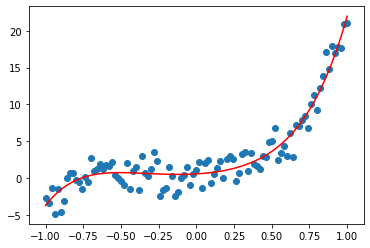

In [70]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()